![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-10)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_2_EXERCISES.ipynb)

# Exercise 1: getting around GIT [OPTIONAL]

You will be provided with further slides on next Tuesday class (15/10/2019). Meanwhile you can try to do the following:

* Create a GitHub account
* Fork the [repository](https://github.com/vfp1/bts-mbds-data-science-foundations-2019) from the course
* Clone the repository in your own computer using `git clone`
* Create a folder within `/sessions` where you will be creating your own notebooks. Since we are using notebooks, it is better that you leave the nootebooks from the course untouched, and that you rather create a copy of them in the  `/sessions` folder where you can edit them. Trust me, it will save you a lot of **merge conflict** problems.
* Sync your fork to the remote origin (the original repo of the course) so you can update it with the new notebooks that I will be adding. Follow [this tutorial](https://help.github.com/en/articles/syncing-a-fork).
* Return this exercise by commiting the whole notebook in your own git and pass the url to me

# Exercise 2: more bikes [OBLIGATORY]

Given [this](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv) dataset:

* Open the dataset using Pandas
* Display the DataFrame
* Describe the DataFrame, can we already see some trends in regards to volume of bikes per region?
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * In each one of the years from the dataset. Which is the month with the highest number of bikes?
        * Plot each year with the number of bikes to also see it visually.
    * In Total, when are the hours with the least amount of riders? Take into consideration all days of the week.
        * Plot the hours with the average amount of riders.
    * In the current year, which is the best route to bike with less people? Use the average of bikers during the whole year.
        * Plot the bikers per hour using yearly average
        * When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?
        * Plot the amount of bikers during those hours on weekdays

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.getcwd()
os.chdir('/Users/laurencewilliams/BTS/Data Science Foundations/Week 3')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
bikes = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',
                   index_col = 'Date')
bikes = bikes.rename(columns = {"Fremont Bridge East Sidewalk": "East", "Fremont Bridge West Sidewalk": "West"})
bikes.head(15)

,East,West
Date,,
02/24/2015 02:00:00 AM,3.0,3.0
01/01/2019 12:00:00 AM,0.0,9.0
01/01/2019 01:00:00 AM,2.0,22.0
02/15/2016 12:00:00 AM,3.0,3.0
01/01/2019 02:00:00 AM,1.0,11.0
01/01/2019 03:00:00 AM,1.0,2.0
01/01/2019 04:00:00 AM,2.0,1.0
01/01/2019 05:00:00 AM,3.0,1.0
01/01/2019 06:00:00 AM,4.0,7.0


In [7]:
bikes.describe()

,East,West
count,61287.000000,61287.000000
mean,52.894790,61.444874
std,67.815951,89.875981
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,71.000000,74.000000
max,698.000000,850.000000


In [4]:
bikes.head()

,East,West
Date,,
02/24/2015 02:00:00 AM,3.0,3.0
01/01/2019 12:00:00 AM,0.0,9.0
01/01/2019 01:00:00 AM,2.0,22.0
02/15/2016 12:00:00 AM,3.0,3.0
01/01/2019 02:00:00 AM,1.0,11.0


In [93]:
#Sort by years and then sort by month

import pandas as pd
import numpy as np

bikes.index = pd.to_datetime(bikes.index)
years = bikes.index.year
months = bikes.index.month
bikes['total'] = bikes['East'] + bikes['West']
bikes['months'] = months
bikes['years'] = years
bikes

,East,West,total,months,years,time,weekday
Date,,,,,,,
2015-02-24 02:00:00,3.0,3.0,6.0,2,2015,02:00:00,1
2019-01-01 00:00:00,0.0,9.0,9.0,1,2019,00:00:00,1
2019-01-01 01:00:00,2.0,22.0,24.0,1,2019,01:00:00,1
2016-02-15 00:00:00,3.0,3.0,6.0,2,2016,00:00:00,0
2019-01-01 02:00:00,1.0,11.0,12.0,1,2019,02:00:00,1
2019-01-01 03:00:00,1.0,2.0,3.0,1,2019,03:00:00,1
2019-01-01 04:00:00,2.0,1.0,3.0,1,2019,04:00:00,1
2019-01-01 05:00:00,3.0,1.0,4.0,1,2019,05:00:00,1
2019-01-01 06:00:00,4.0,7.0,11.0,1,2019,06:00:00,1


In [9]:
bikes_indexed = pd.pivot_table(bikes, index=[years, months], aggfunc = {'total': np.mean})
bikes_indexed.index.names = ['Years', 'Months']
bikes_indexed

total
Years Months            
2012  10       94.389368
      11       70.343056
      12       48.883065
2013  1        60.327957
      2        74.444940
      3        88.829301
      4        99.997222
      5       145.932796
      6       138.272981
      7       158.567204
      8       140.522849
      9       112.123611
      10      109.344086
      11       82.319444
      12       58.538978
2014  1        80.474462
      2        69.977679
      3        85.456258
      4       120.631944
      5       159.467742
      6       154.037500
      7       162.189516
      8       151.196237
      9       135.497222
      10      111.806452
      11       79.152778
      12       65.197581
2015  1        81.491935
      2        87.290179
      3        95.752355
...                  ...
2017  4        95.018056
      5       146.625000
      6       149.723611
      7       159.817204
      8       161.543011
      9       134.025000
      10      118.471774
      11       80.116667
      12       61.642473
2018  1        78.751344
      2        75.412202
      3       104.016151
      4       111.037500
      5       174.479839
      6       157.145833
      7       172.067204
      8       150.280914
      9       133.669444
      10      122.287634
      11       95.043056
      12       63.092742
2019  1        97.961022
      2        53.718750
      3       114.861559
      4       122.127778
      5       173.552419
      6       184.044444
      7       185.099462
      8       191.416667
      9       155.797222

[84 rows x 1 columns]

In [10]:
bikes_maxx = bikes_indexed.loc[bikes_indexed.groupby("Years")["total"].idxmax()]
bikes_maxx

,,total
Years,Months,
2012,10,94.389368
2013,7,158.567204
2014,7,162.189516
2015,6,157.940278
2016,5,153.439516
2017,8,161.543011
2018,5,174.479839
2019,8,191.416667


In [48]:
import datetime
month_numbers = bikes_maxx.index.get_level_values(1)
month_names = []
for i in month_numbers:
    month_names.append(datetime.date(1900, i, 1).strftime('%B'))
month_names

['October', 'July', 'July', 'June', 'May', 'August', 'May', 'August']

Text(0.5, 1.0, 'Highest Months 2012-2019')

Text(0.5, 0, '(Years, Months)')

Text(-0.10000000000000003, 97.38936781609195, 'October')

Text(0.8999999999999999, 161.56720430107526, 'July')

Text(1.9000000000000001, 165.18951612903226, 'July')

Text(2.9, 160.94027777777777, 'June')

Text(3.9, 156.43951612903226, 'May')

Text(4.8999999999999995, 164.54301075268816, 'August')

Text(5.8999999999999995, 177.4798387096774, 'May')

Text(6.8999999999999995, 194.41666666666666, 'August')

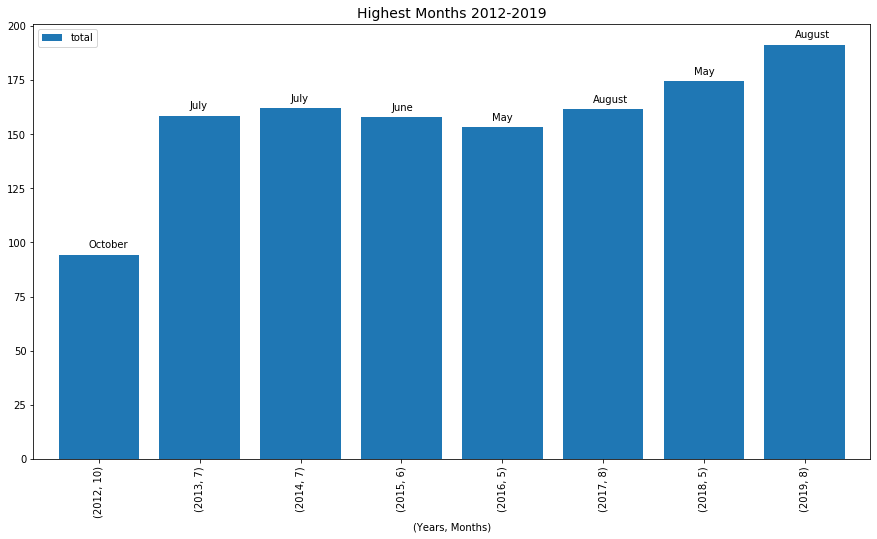

In [55]:
ax = bikes_maxx.plot(kind='bar', figsize=(15,8), width = 0.8)
ax.set_title("Highest Months 2012-2019", fontsize = 14)
ax.set_xlabel ("(Years, Months)", fontsize = 10)

count=0

for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+3, month_names[count])
    count = count+1

In [56]:
bikes['time'] = bikes.index.time
bikes_hours = pd.pivot_table(index = ['time'], data = bikes, aggfunc = {'total': np.mean})
bikes_hours = bikes_hours.sort_values(['total'], ascending=True)
bikes_hours

,total
time,
03:00:00,3.037588
02:00:00,4.129463
01:00:00,6.273688
04:00:00,6.694205
00:00:00,11.850039
23:00:00,21.408771
05:00:00,26.426782
22:00:00,32.420517
21:00:00,49.132341


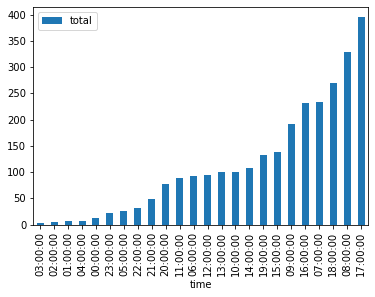

In [57]:
bikes_hours.plot.bar()

In [94]:
bikes_2019 = bikes.loc[bikes['years'] == 2019]
bikes_2019['weekday'] = bikes_2019.index.weekday
type(bikes_2019.index)

/Users/laurencewilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pandas.core.indexes.datetimes.DatetimeIndex

In [59]:
bikes_times = pd.pivot_table(bikes_2019, index=['years', 'time'], aggfunc = {'total': np.mean})
bikes_times

total
years time                
2019  00:00:00   11.703297
      01:00:00    6.637363
      02:00:00    3.908425
      03:00:00    3.128205
      04:00:00    7.578755
      05:00:00   29.912088
      06:00:00  103.802198
      07:00:00  283.827839
      08:00:00  416.575092
      09:00:00  237.065934
      10:00:00  127.483516
      11:00:00  117.652015
      12:00:00  124.465201
      13:00:00  129.882784
      14:00:00  139.904762
      15:00:00  182.992674
      16:00:00  315.516484
      17:00:00  499.978022
      18:00:00  317.538462
      19:00:00  159.190476
      20:00:00   91.901099
      21:00:00   59.293040
      22:00:00   36.695971
      23:00:00   23.065934

In [96]:
daysofweek = [0,1,2,3,4]
bikes_2019_weekdays = bikes_2019.loc[bikes_2019['weekday'].isin(daysofweek)]
bikes_2019_weekdays

,East,West,total,months,years,time,weekday
Date,,,,,,,
2019-01-01 00:00:00,0.0,9.0,9.0,1,2019,00:00:00,1
2019-01-01 01:00:00,2.0,22.0,24.0,1,2019,01:00:00,1
2019-01-01 02:00:00,1.0,11.0,12.0,1,2019,02:00:00,1
2019-01-01 03:00:00,1.0,2.0,3.0,1,2019,03:00:00,1
2019-01-01 04:00:00,2.0,1.0,3.0,1,2019,04:00:00,1
2019-01-01 05:00:00,3.0,1.0,4.0,1,2019,05:00:00,1
2019-01-01 06:00:00,4.0,7.0,11.0,1,2019,06:00:00,1
2019-01-01 07:00:00,1.0,2.0,3.0,1,2019,07:00:00,1
2019-01-01 08:00:00,8.0,9.0,17.0,1,2019,08:00:00,1


In [97]:
type(bikes_2019_weekdays.index)
type(bikes_maxx.index)
type(bikes.index)
type(bikes_indexed.index)

pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.multi.MultiIndex

pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.multi.MultiIndex

In [98]:
bikes_2019_weekdays = bikes_2019_weekdays.between_time('10:00:00', '15:00:00').groupby('time').aggregate(np.mean)
bikes_2019_weekdays

,East,West,total,months,years,weekday
time,,,,,,
10:00:00,53.241026,72.369231,125.610256,5,2019,2
11:00:00,43.794872,53.528205,97.323077,5,2019,2
12:00:00,44.020513,56.010256,100.030769,5,2019,2
13:00:00,45.810256,59.256410,105.066667,5,2019,2
14:00:00,46.969231,70.635897,117.605128,5,2019,2
15:00:00,65.825641,113.389744,179.215385,5,2019,2


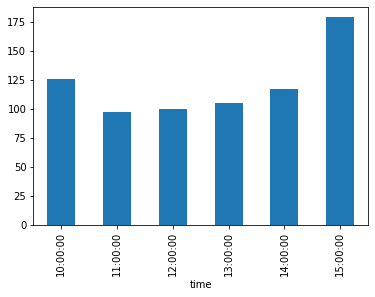

In [99]:
bikes_2019_weekdays['total'].plot.bar()

# Exercise 3: SQLite and Pandas [OBLIGATORY]

Download [this Sqlite database](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db)

You can either use SQLite database entirely or load the SQL query in Pandas to reply to the following questions:

*   Which is the highest city that as an airport?
*   And which is the lowest city that as an airport?
*   Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them. Plot it as a histogram as well.
*   Which country has more airlines? And which one has less?
*   Which city has the most outgoing destinations? And the least?
*   And which city has the most incoming destinations? And the least?



1) Which is the highest city that as an airport?

In [34]:
import sqlite3
import pandas as pd

def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

In [37]:
conn, cursor = create_connect_database("/users/laurencewilliams/Downloads/flights.db")

query = """SELECT city, altitude FROM airports ORDER BY altitude DESC;"""

In [38]:
df = pd.read_sql_query(query, conn)

In [77]:
df.sort_values('altitude', ascending=False).head()

,city,altitude
6108,Daocheng,14472
6149,Bangda,14219
6192,Kangding,14042
6274,Shiquanhe,13780
6334,Irkutsk,13411


2) And which is the lowest city that as an airport?

In [42]:
type(df.altitude[2])

str

In [60]:
df1 = df['altitude'].apply(lambda row: int(row))

In [70]:
df['altitude'] = df1
type(df.altitude[2])

numpy.int64

In [74]:
df.sort_values('altitude').head()

,city,altitude
8105,Metzada,-1266
8102,Eyn-yahav,-164
8094,Ramsar,-70
8095,Astrakhan,-65
8096,Noshahr,-61


3) Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them. Plot it as a histogram as well.

In [115]:
conn, cursor = create_connect_database("/users/laurencewilliams/Downloads/flights.db")

query = """SELECT timezone, COUNT(name) FROM airports GROUP BY timezone ORDER BY COUNT(name);"""

df_timezone = pd.read_sql_query(query, conn)

In [118]:
a = df_timezone
a.head()

,timezone,COUNT(name)
0,Africa/Banjul,1
1,Africa/Bujumbura,1
2,Africa/Mbabane,1
3,Africa/Porto-Novo,1
4,America/Anguilla,1


In [120]:
a.set_index('timezone')
a.head()

,timezone,COUNT(name)
0,Africa/Banjul,1
1,Africa/Bujumbura,1
2,Africa/Mbabane,1
3,Africa/Porto-Novo,1
4,America/Anguilla,1


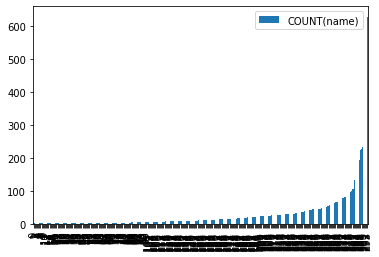

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
a.plot.bar()

* Which country has more airlines? And which one has less?

In [134]:
conn, cursor = create_connect_database("/users/laurencewilliams/Downloads/flights.db")

query = """SELECT country, COUNT(active)
        FROM airlines 
        WHERE active = 'Y'
        GROUP BY country ORDER BY COUNT(active) DESC;"""

df_countries = pd.read_sql_query(query, conn)

In [135]:
df_countries.head()

,country,COUNT(active)
0,United States,141
1,Russia,72
2,United Kingdom,40
3,Germany,37
4,Canada,34


In [137]:
df_countries.tail()

,country,COUNT(active)
190,Syrian Arab Republic,1
191,Togo,1
192,Trinidad and Tobago,1
193,Turkmenistan,1
194,Vanuatu,1


* Which city has the most outgoing destinations? And the least?

In [149]:
conn, cursor = create_connect_database("/users/laurencewilliams/Downloads/flights.db")

query = """SELECT CAST(airports.city AS TEXT) AS ciudad, COUNT(source) as caca
FROM routes
INNER JOIN airports
    ON routes.source = airports.code
GROUP BY ciudad ORDER BY caca DESC;"""

df_city_source = pd.read_sql_query(query, conn)

In [150]:
df_city_source.head()

,ciudad,caca
0,London,1232
1,Atlanta,915
2,Paris,725
3,Chicago,697
4,Shanghai,616


In [151]:
df_city_source.tail()

,ciudad,caca
3143,Yasuj,1
3144,Yola,1
3145,Yuzhno-Kurilsk,1
3146,Çorlu,1
3147,Île des Pins,1


* And which city has the most incoming destinations? And the least?

In [152]:
query = """SELECT CAST(airports.city AS TEXT) AS ciudad, COUNT(dest) as caca
FROM routes
INNER JOIN airports
    ON routes.dest = airports.code
GROUP BY ciudad ORDER BY caca DESC;"""

df_city_dest = pd.read_sql_query(query, conn)

In [153]:
df_city_dest.head()

,ciudad,caca
0,London,1224
1,Atlanta,911
2,Paris,720
3,Chicago,682
4,Shanghai,620


In [154]:
df_city_dest.tail()

,ciudad,caca
3147,Yuzhno-Kurilsk,1
3148,Zachar Bay,1
3149,Ziguinchor,1
3150,Çorlu,1
3151,Île des Pins,1
